# House Price Prediction using Machine Learning

### SCENARIO:
### A man named Dave would like to sell his 3-bedroom house in Seattle, but has no idea how much to list it for. 
### Through multiple linear regression, we can predict the right price for his house.

In [53]:
# Start by importing the necessary modules
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np

In [79]:
#Load the data into a dataframe
df = pd.read_csv('C:/Users/Anzel/Downloads/Portfolio/Housing/data.csv')
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

In [57]:
# We start with 4,600 rows in our dataset

print(df.shape)

(4600, 18)


### Data Cleaning

#### Find and Remove Outliers (and Null Values)

<AxesSubplot:xlabel='price'>

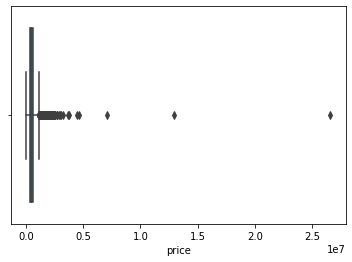

In [56]:
# The boxplot of thr price column indicated that there are many outliers

sns.boxplot(x = df['price'])

In [80]:
# Drop the rows where values in these columns are Null

df = df.dropna(subset=['price', 'bedrooms', 'bathrooms', 'sqft_living', 'yr_built'])

In [81]:
#Remove outliers

columns_list = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built']

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
for column in columns_list:
    df = df.loc[(df[column] > (Q1[column] - (1.5*IQR[column])))]
    df = df.loc[(df[column] < (Q3[column] + (1.5*IQR[column])))]

print(df.shape)
# 3,723 rows remain

(3723, 18)


### DATA VISUALIZATION

Text(0, 0.5, 'Frequency')

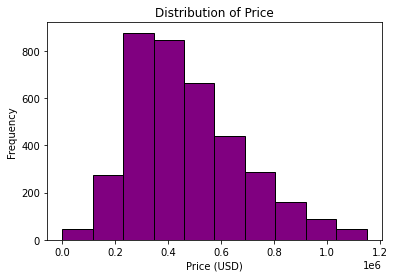

In [64]:
df.price.plot(kind='hist', color = 'purple', edgecolor = 'black')
plt.title('Distribution of Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

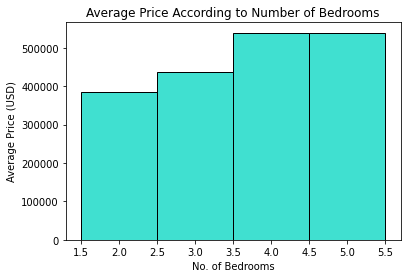

In [87]:
fig = plt.figure()
x = np.unique(df['bedrooms'])
y = df.groupby(['bedrooms']).mean()
y = y['price']
plt.bar(x, y, color ='turquoise', edgecolor='black', width = 1)
 
plt.xlabel("No. of Bedrooms")
plt.ylabel("Average Price (USD)")
plt.title("Average Price According to Number of Bedrooms")
plt.show()

# We see that adding a 5th bedroom doesn't make much of a price difference

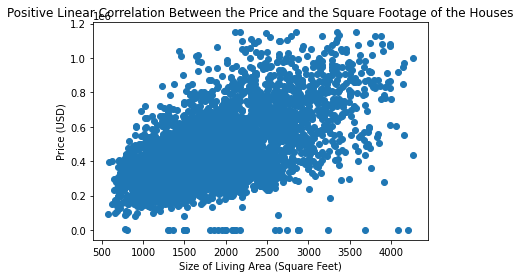

In [84]:
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel("Size of Living Area (Square Feet)")
plt.ylabel("Price (USD)")
plt.title("Positive Linear Correlation Between the Price and the Square Footage of the Houses")
plt.show()

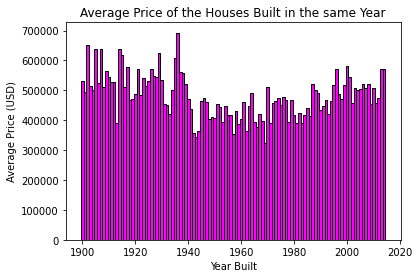

In [89]:
fig = plt.figure()
x = np.unique(df['yr_built'])
y = df.groupby(['yr_built']).mean()
y = y['price']
plt.bar(x, y, color ='magenta', edgecolor='black', width = 1)
 
plt.xlabel("Year Built")
plt.ylabel("Average Price (USD)")
plt.title("Average Price of the Houses Built in the same Year")
plt.show()

#No real relationship between the house's age and its price

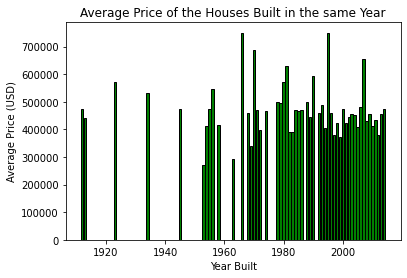

In [94]:
df_renovated = df.loc[df['yr_renovated'] != 0]
fig = plt.figure()
x = np.unique(df_renovated['yr_renovated'])
y = df_renovated.groupby(['yr_renovated']).mean()
y = y['price']
plt.bar(x, y, color ='green', edgecolor='black')
 
plt.xlabel("Year Built")
plt.ylabel("Average Price (USD)")
plt.title("Average Price of the Houses Built in the same Year")
plt.show()


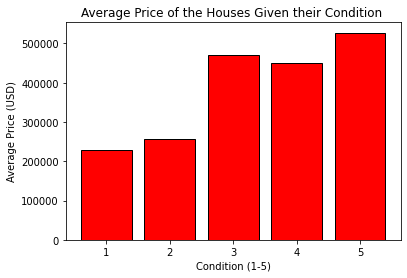

In [96]:
fig = plt.figure()
x = np.unique(df['condition'])
y = df.groupby(['condition']).mean()
y = y['price']
plt.bar(x, y, color ='red', edgecolor='black')
 
plt.xlabel("Condition (1-5)")
plt.ylabel("Average Price (USD)")
plt.title("Average Price of the Houses Given their Condition ")
plt.show()

### PRICE PREDICTION WITH MULTIPLE LINEAR REGRESSION

In [44]:
df_s = df.loc[df['city'] == 'Seattle']
X = df_s[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'yr_built']]
y = df_s['price']
model = LinearRegression()
model.fit(X, y)

Beds = 3
Baths = 2.5
living_squares = 2655
lot_squares = 6300
condition = 3
built = 2007

predicted_price = model.predict([[Beds, Baths, living_squares, lot_squares, condition, built]])
print('Predicted price:  $', round(predicted_price[0],2))

Predicted price:  $ 622868.86


C:\Users\Anzel\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### This price can be compared to average of other houses that meet the same requirement

In [51]:
df_seattle = df.loc[df['city'] == 'Seattle']
df_seattle = df_seattle.loc[df['bedrooms'] == 3]
df_seattle = df_seattle.loc[df['bathrooms'] == 2.5]
df_seattle = df_seattle.loc[df['condition'] == 3]
df_seattle = df_seattle.loc[(df['sqft_living'] >= 2300) & (df['sqft_living'] <=2900)]
df_seattle = df_seattle.loc[(df['yr_built'] >= 2000) & (df['yr_built']<= 2010)]

print('Average price of houses with the same requirements: $', np.average(df_seattle['price']))

Average price of houses with the same requirements: $ 649200.0
